In [ ]:
#connecting to google drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#Preprocessing
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize

target = []                 #list for output(1-D) data(dependent variable)
images = []                 #list for input(2-D) data
flat_data = []              #list for flattened input data(1-D)(independent variable)

DATADIR = '/content/drive/MyDrive/mp trial2/Train'
CATEGORIES = ['Tomato___Leaf_Mold','Tomato___Late_blight','Tomato___healthy','Potato___Late_blight','Potato___healthy','Potato___Early_blight','Grape___healthy','Grape___Esca_(Black_Measles)','Grape___Black_rot','Corn_(maize)___Northern_Leaf_Blight','Corn_(maize)___healthy','Corn_(maize)___Common_rust_','Apple___healthy','Apple___Apple_scab']

for i in CATEGORIES:
  class_num = CATEGORIES.index(i)               #label encoding
  path = os.path.join(DATADIR,i)                #creating a path to use all the images
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resized = resize(img_array,(150,150,3))  #normalizing each and every image iteratively to a number between 0 and 1
    flat_data.append(img_resized.flatten())     #flattening the data and storing in the list
    images.append(img_resized)
    target.append(class_num)
   
flat_data = np.array(flat_data)
images = np.array(images)                         #transforming all the data into a 1-D array
target = np.array(target)

In [ ]:
target

array([ 0,  0,  0, ..., 13, 13, 13])

In [ ]:
unique,count = np.unique(target,return_counts=True)

<BarContainer object of 14 artists>

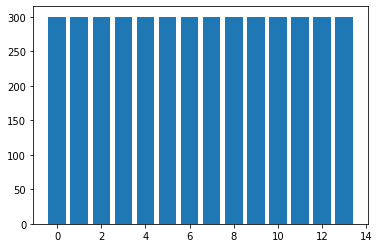

In [ ]:
plt.bar(unique,count)

In [ ]:
#Splitting the data into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(flat_data,target,test_size=0.2,random_state=42)

In [ ]:
import pickle
import warnings
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

SVC

In [ ]:
from sklearn.svm import SVC
model = SVC(probability=True)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_pred

array([ 5,  7,  5, 11,  0,  6, 13,  1, 11,  8,  3,  7,  4, 12,  9,  7, 11,
        1,  6,  2, 10,  3,  3,  8,  8, 12,  7,  5,  2,  7, 13,  8,  9,  1,
        2,  6,  1,  3,  7,  2, 12,  8,  2,  0,  4,  0,  8,  7,  3,  2,  5,
        8,  1,  4,  5,  0,  0,  5,  2, 13, 13,  3,  7,  1,  2,  6,  6,  2,
        6, 10, 12, 13,  7,  0,  3, 12,  1,  8,  3,  4,  6,  0,  9,  3,  0,
       10,  6,  2,  8,  7,  0,  0, 13,  2,  6, 12,  5,  5, 10, 13,  0,  3,
       12, 12,  8,  5,  7,  7,  5,  1,  3, 13,  8,  0,  0,  8, 11,  7, 13,
       12, 13,  2,  2,  7,  1,  8, 10,  0,  2,  7,  3,  0,  0,  9,  9,  0,
        8, 11,  1,  9,  1,  9,  2,  6,  8,  3, 11,  9,  0,  0,  5,  3,  5,
        2,  7, 13, 13,  6,  6,  6,  3,  9,  3, 11,  4,  3, 10,  5,  1,  0,
       12, 12,  3,  2,  1,  7, 10, 13,  4, 12,  3, 12,  1,  4,  8,  7,  4,
       12,  6,  2,  2, 10,  4,  0,  1, 12,  3,  9,  4,  2,  0, 10,  7, 11,
        9,  3, 10,  3, 11, 13,  7, 10,  3,  6,  7, 13, 11,  2, 12,  7,  2,
        7,  9,  9,  0,  2

In [ ]:
accuracy_score(y_pred,y_test)

0.8

In [ ]:
confusion_matrix(y_pred,y_test)

array([[60,  3,  0,  0,  1,  0,  0,  0,  0,  1,  0,  0,  5,  2],
       [ 3, 47,  3,  2,  0,  0,  0,  1,  0,  4,  0,  0,  1,  1],
       [ 1,  3, 54,  1,  3,  0,  0,  0,  0,  0,  0,  0,  2,  2],
       [ 7,  1,  1, 49, 12,  3,  2,  0,  0,  1,  0,  0,  1,  0],
       [ 2,  0,  0,  1, 40,  0,  1,  0,  0,  0,  0,  0,  1,  1],
       [ 0,  4,  0,  2,  1, 47,  0,  0,  0,  0,  0,  0,  3,  1],
       [ 0,  0,  0,  0,  8,  0, 46,  1,  2,  0,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  2,  0,  0, 54, 23,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  8, 47,  0,  0,  0,  1,  0],
       [ 0,  5,  2,  2,  0,  0,  0,  0,  0, 42,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 48,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  1, 51,  0,  0],
       [ 4,  2,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0, 46,  4],
       [ 2,  0,  0,  1,  0,  3,  1,  0,  0,  0,  0,  0,  5, 41]])

In [ ]:
#saving the model using pickle
import joblib
joblib.dump(model,'leaf disease detection')

['leaf disease detection']

Enter the url of image:https://image.shutterstock.com/image-photo/tomato-leaves-isolated-on-white-260nw-1251320371.jpg
(280, 375, 3)
Predicted output:Tomato___healthy


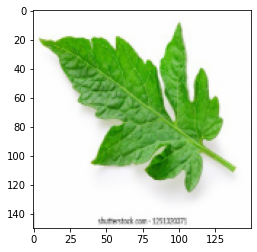

In [ ]:
#Testing random image
flat_data = []
url = input('Enter the url of image:')
img = imread(url)
img_resized = resize(img,(150,150,3)) 
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f'Predicted output:{y_out}')

In [ ]:
svc_classifier = SVC(kernel='linear')
svc_classifier.fit(x_train, y_train)
y_pred2 = svc_classifier.predict(x_test)
y_pred2

array([10, 11,  9, ...,  9,  6, 10])

In [ ]:
accuracy_score(y_pred2,y_test)

0.7171428571428572